<a href="https://colab.research.google.com/github/xie186/Algorithms_for_DNA-Sequencing/blob/main/docs/bioi611_monocle_cele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#

## Why single cell trajectory analysis

The development of cells in multicellular organisms is a tightly regulated process that unfolds through a series of lineage decisions and differentiation events. These processes result in a diverse array of specialized cell types, each with distinct functional roles. Understanding the dynamics of cell development is crucial for elucidating fundamental biological mechanisms, and single-cell RNA sequencing (scRNA-seq) has emerged as a powerful tool for studying these processes at an unprecedented resolution.

Trajectory analysis, combined with pseudotime reconstruction, provides a framework for investigating the temporal and developmental progression of cells within a dataset. Using computational tools like Monocle3, researchers can infer cell trajectories based on the high-dimensional expression profiles of genes, identifying how undifferentiated cells transition through intermediate states toward terminal fates.


* Trajectory Reconstruction:

Tools like Monocle3 organize single cells into trajectories by arranging them along a developmental axis, reflecting the continuum of cellular states.

These trajectories are inferred without prior knowledge of time or lineage markers, making them especially powerful for systems where developmental pathways are not fully mapped.

* Pseudotime Analysis:

Pseudotime represents an inferred temporal ordering of cells along a trajectory.

It enables the identification of genes and pathways that are dynamically regulated as cells transition through developmental states.



## Developmental process of the cell types in *C. elegans*

The developmental process of the cell types involves a progression through various stages, starting from neuroblasts (progenitor cells) and leading to differentiated neuron types, as described below:

1. Neuroblasts (Progenitors):

The process begins with neuroblasts, which are multipotent progenitor cells. Examples include:
* Neuroblast_ADF_AWB: Precursor to the ADF and AWB neurons.
* Neuroblast_AFD_RMD: Precursor to the AFD and RMD neurons.
* Neuroblast_ASE_ASJ_AUA: Precursor to the ASE, ASJ, and AUA neurons.
* Neuroblast_ASG_AWA: Precursor to the ASG and AWA neurons.

2. Parent Cells:

Some intermediate stages are represented by parent cell types, such as:
* ADL_parent: Gives rise to ADL neurons.
* ASI_parent: Gives rise to ASI neurons.
* ASE_parent: Gives rise to ASEL and ASER neurons.
* ASK_parent: Gives rise to ASK neurons.

3. Differentiated Neurons:

Fully differentiated neurons emerge from the parent cells and neuroblasts, including:

* ADF (Amphid Dorsal Left)
* ADL (Amphid Dorsal Left)
* AFD (Amphid Fan-shaped Dorsal)
* ASE (Amphid Sensory neurons), with subtypes ASEL (Left) and ASER (Right).
* ASG (Amphid Sensory neurons Group)
* ASH (Amphid Sensory neurons Hypodermal)
* ASI (Amphid Sensory neurons Inner)
* ASJ (Amphid Sensory neurons Junction)
* ASK (Amphid Sensory neurons King)
* AWA (Amphid Wing-shaped neurons A)
* AWB (Amphid Wing-shaped neurons B)
* AWC (Amphid Wing-shaped neurons C), with subtype AWC_ON.
* AUA (Amphid Unpaired A neuron)

The neuroblasts differentiate into parent cell types or directly into specific neuron subtypes. Parent cells serve as intermediate stages, further dividing or maturing into various functional neuron types. This hierarchical process ensures the development of diverse neuronal subtypes specialized for distinct sensory and functional roles.

## R package installation

Installation of the required packages may take more than 1.5 hours.

Same as other lab notes, a `.tar.gz` file includes all the library files will be downloaded and uncompressed for preparing the R environment.

In [ ]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#install.packages("BiocManager")
#BiocManager::install(version = "3.20")

In [ ]:
## required by scater package
system("apt-get install libx11-dev libcairo2-dev") #, intern = TRUE)

In [ ]:
#BiocManager::install(c('BiocGenerics', 'DelayedArray', 'DelayedMatrixStats',
#                       'limma', 'lme4', 'S4Vectors', 'SingleCellExperiment',
#                       'SummarizedExperiment', 'batchelor', 'HDF5Array',
#                       'terra', 'ggrastr'))

In [ ]:
#install.packages("devtools")
#devtools::install_github('cole-trapnell-lab/monocle3')

In [ ]:
#system("tar zcvf R_lib_monocle3.tar.gz /usr/local/lib/R/site-library")

## Configure the environment using existing library files

In [ ]:
# https://drive.google.com/file/d/1wCqb1oCfxeplWR7jf3vkPWDavVsGAQzZ/view?usp=sharing
system("gdown 1wCqb1oCfxeplWR7jf3vkPWDavVsGAQzZ")

In [ ]:
system("md5sum R_lib_monocle3.tar.gz", intern = TRUE)

[1] "74998728fb9870f0e3e728c7c6449532  R_lib_monocle3.tar.gz"

In [ ]:
system("tar zxvf R_lib_monocle3.tar.gz")

In [ ]:
.libPaths(c("/content/usr/local/lib/R/site-library", .libPaths()))

In [ ]:
.libPaths()

[1] "/content/usr/local/lib/R/site-library"
[2] "/usr/local/lib/R/site-library"        
[3] "/usr/lib/R/site-library"              
[4] "/usr/lib/R/library"

## Load required R packages

In [ ]:
library(monocle3)
library(dplyr)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Load

When we were working on the scRNA-seq data in C. elegans, we didn't perform cell type annotation because of limited time.

In [ ]:
expression_matrix <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_expression.rds"))
cell_metadata <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_colData.rds"))
gene_annotation <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_rowData.rds"))

cds <- new_cell_data_set(expression_matrix,
                         cell_metadata = cell_metadata,
                         gene_metadata = gene_annotation)

In [ ]:
class(expression_matrix)
dim(expression_matrix)

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

[1] 20222  6188

In [ ]:
head(cell_metadata, 4)

,cell,n.umi,time.point,batch,Size_Factor,raw.embryo.time,embryo.time,embryo.time.bin,raw.embryo.time.bin,lineage,num_genes_expressed,cell.type,bg.300.loading,bg.400.loading,bg.500.1.loading,bg.500.2.loading,bg.r17.loading,bg.b01.loading,bg.b02.loading
,<chr>,<dbl>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCTGCAAGACGTG-300.1.1,AAACCTGCAAGACGTG-300.1.1,1003,300_minutes,Waterston_300_minutes,0.7795692,350,350,330-390,330-390,ABalpppapav/ABpraaaapav,646,AFD,0.808794,0.2324676,-2.000489,-2.425965,-0.5436492,-2.2848042,-2.1302609
AAACCTGGTGTGAATA-300.1.1,AAACCTGGTGTGAATA-300.1.1,1458,300_minutes,Waterston_300_minutes,1.1332123,190,190,170-210,170-210,ABalppppa/ABpraaapa,857,NA,9.220938,3.9429037,-3.420859,-3.479376,4.8987977,1.6406862,0.1534805
AAACCTGTCGGCCGAT-300.1.1,AAACCTGTCGGCCGAT-300.1.1,1633,300_minutes,Waterston_300_minutes,1.2692289,260,245,210-270,210-270,ABpxpaaaaa,865,NA,6.008029,2.2257000,-3.630310,-3.828569,1.9894965,-0.1370570,-0.5189810
AAAGATGGTTCGTTGA-300.1.1,AAAGATGGTTCGTTGA-300.1.1,1716,300_minutes,Waterston_300_minutes,1.3337396,220,225,210-270,210-270,NA,873,NA,7.518360,3.0385123,-3.932011,-4.290579,1.9108642,-0.9612141,-2.2660029
AACCATGAGAAACCTA-300.1.1,AACCATGAGAAACCTA-300.1.1,1799,300_minutes,Waterston_300_minutes,1.3982503,340,325,270-330,330-390,ABalpppappp/ABpraaaappp,1068,ASK_parent,1.818976,-0.5808464,-3.421262,-3.757814,-1.4435403,-2.9353703,-2.6137316
AACCATGAGTTGAGAT-300.1.1,AACCATGAGTTGAGAT-300.1.1,2527,300_minutes,Waterston_300_minutes,1.9640792,330,670,> 650,330-390,ABalppppppaa/ABpraaapppaa,1302,ASEL,1.381071,-0.3589031,-2.530030,-2.935656,-0.7653072,-2.0582514,-1.8417070


In [ ]:
table(cell_metadata$cell.type)


                   ADF                ADF_AWB                    ADL 
                   170                    102                    477 
            ADL_parent                    AFD                    ASE 
                   148                    326                    205 
            ASE_parent                   ASEL                   ASER 
                   149                     38                     39 
                   ASG                ASG_AWA                    ASH 
                   173                     99                    345 
                   ASI             ASI_parent                    ASJ 
                   212                    187                    320 
                   ASK             ASK_parent                    AUA 
                   233                    150                     98 
                   AWA                    AWB                    AWC 
                   236                    212                    309 
                AWC

In [ ]:
head(gene_annotation)

,id,gene_short_name,num_cells_expressed
,<chr>,<chr>,<int>
WBGene00010957,WBGene00010957,nduo-6,6038
WBGene00010958,WBGene00010958,ndfl-4,1597
WBGene00010959,WBGene00010959,nduo-1,5342
WBGene00010960,WBGene00010960,atp-6,5921
WBGene00010961,WBGene00010961,nduo-2,2686
WBGene00000829,WBGene00000829,ctb-1,5079


## Pre-process the data


Most analyses (including trajectory inference, and clustering) in Monocle3, require various normalization and preprocessing steps. preprocess_cds executes and stores these preprocessing steps.

Specifically, depending on the options selected, `preprocess_cds` first normalizes the data by log and size factor to address depth differences, or by size factor only. Next, `preprocess_cds` calculates a lower dimensional space that will be used as the input for further dimensionality reduction like tSNE and UMAP.

In monocle3, `cds` is short for `cell_data_set` (CDS) object.

In [ ]:
cds <- preprocess_cds(cds, num_dim = 50)

Data sets that contain cells from different groups often benefit from alignment to subtract differences between them. Alignment can be used to remove batch effects, subtract the effects of treatments, or even potentially compare across species. align_cds executes alignment and stores these adjusted coordinates.

This function can be used to subtract both continuous and discrete batch effects.

In [ ]:
cds <- align_cds(cds, alignment_group = "batch",
           residual_model_formula_str = "~ bg.300.loading + bg.400.loading +
           bg.500.1.loading + bg.500.2.loading + bg.r17.loading +
           bg.b01.loading + bg.b02.loading")

Aligning cells from different batches using Batchelor.
Please remember to cite:
	 Haghverdi L, Lun ATL, Morgan MD, Marioni JC (2018). 'Batch effects in single-cell RNA-sequencing data are corrected by matching mutual nearest neighbors.' Nat. Biotechnol., 36(5), 421-427. doi: 10.1038/nbt.4091



## Reduce dimensionality and visualize the results

In [ ]:
cds <- reduce_dimension(cds)


No preprocess_method specified, and aligned coordinates have been computed previously. Using preprocess_method = 'Aligned'



No trajectory to plot. Has learn_graph() been called yet?

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text_repel()`).”


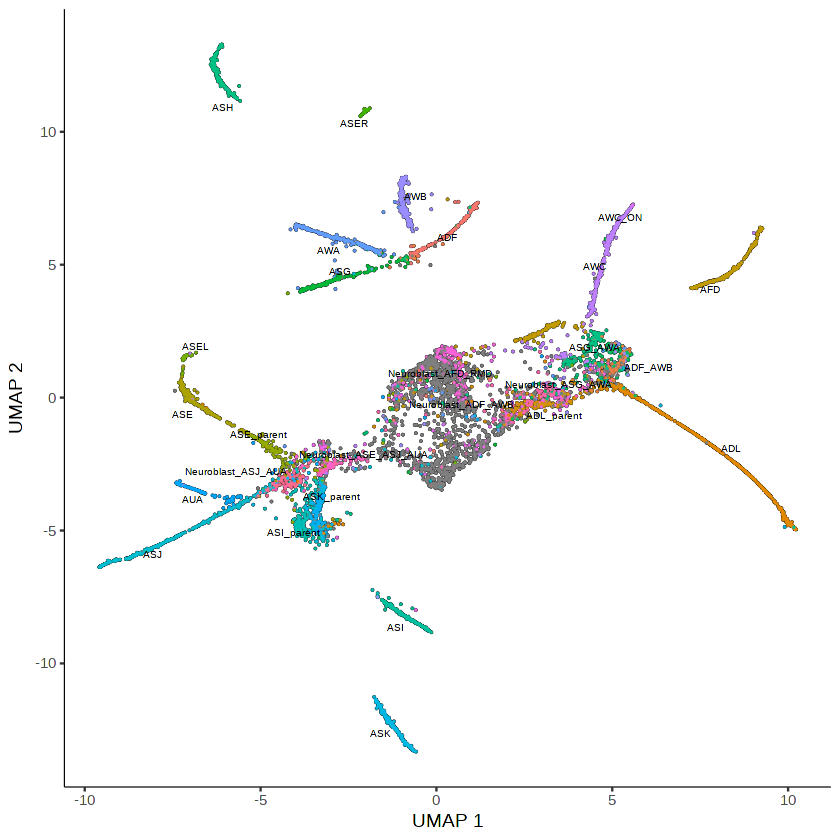

In [ ]:
plot_cells(cds, label_groups_by_cluster=FALSE,  color_cells_by = "cell.type")

You can use `plot_cells()` to visualize the variation of individual genes along the trajectory. Let's examine a few genes that exhibit intriguing expression patterns in ciliated neurons:

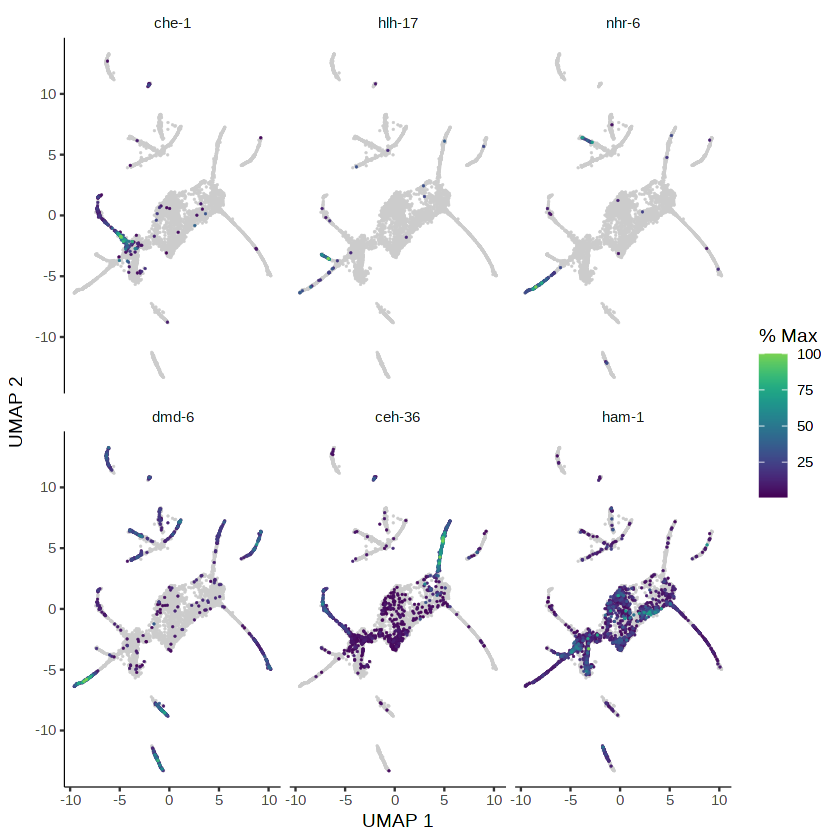

In [ ]:
ciliated_genes <- c("che-1",
                    "hlh-17",
                    "nhr-6",
                    "dmd-6",
                    "ceh-36",
                    "ham-1")

plot_cells(cds,
           genes=ciliated_genes,
           label_cell_groups=FALSE,
           show_trajectory_graph=FALSE)

The C. elegans *che-1* gene encodes a zinc finger transcription factor required for specification of the ASE chemosensory neurons.

## Cluster your cells

This function takes a `cell_data_set` as input, clusters the cells using Louvain or Leiden community detection, and returns a `cell_data_set` with internally stored cluster assignments. In addition to clustering, the function calculates partitions, representing superclusters of the Louvain or Leiden communities, identified through a kNN pruning method. Cluster assignments can be accessed via the `clusters` function, and partition assignments can be accessed via the `partitions` function.

In [ ]:
cds <- cluster_cells(cds)


No trajectory to plot. Has learn_graph() been called yet?



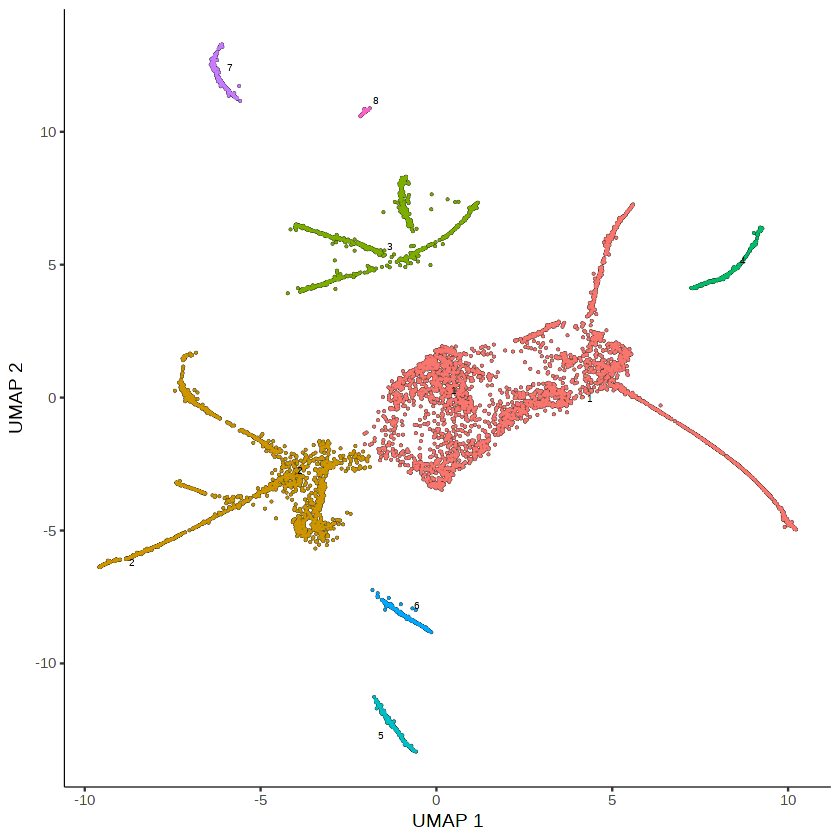

In [ ]:
plot_cells(cds, color_cells_by = "partition")

## Learn the trajectory graph

Monocle3 aims to learn how cells transition through a biological program of gene expression changes in an experiment.

Each cell can be viewed as a point in a high-dimensional space, where each dimension describes the expression of a different gene.

Identifying the program of gene expression changes is equivalent to learning a trajectory that the cells follow through this space.

However, the more dimensions there are in the analysis, the harder the trajectory is to learn.

Fortunately, many genes typically co-vary with one another, and so the dimensionality of the data can be reduced with a wide variety of different algorithms.

Monocle3 provides two different algorithms for dimensionality reduction via reduce_dimension (UMAP and tSNE). Both take a cell_data_set object and a number of dimensions allowed for the reduced space.

You can also provide a model formula indicating some variables (e.g. batch ID or other technical factors) to "subtract" from the data so it doesn't contribute to the trajectory. The function learn_graph is the fourth step in the trajectory building process after preprocess_cds, reduce_dimension, and cluster_cells. After learn_graph, order_cells is typically called.





Principal graph

Monocle uses reverse graph embedding (RGE) to map the cells to a lower-dimensional latent space, i.e. each cell $\boldsymbol{x}_i, i=1, \ldots, N$ has a corresponding latent point $\boldsymbol{z}_i$. These latent points are clustered in a way similar to k-means by iteratively fitting of a small set of centroids, $\boldsymbol{y}_k, k=1, \ldots, K(K \leq N)$. The principal graph is then built on these centroids. Finally the latent points are mapped on the nearest point on this qraph to obtain their pseudotimes

  |======================================================================| 100%
  |======================================================================| 100%


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text_repel()`).”


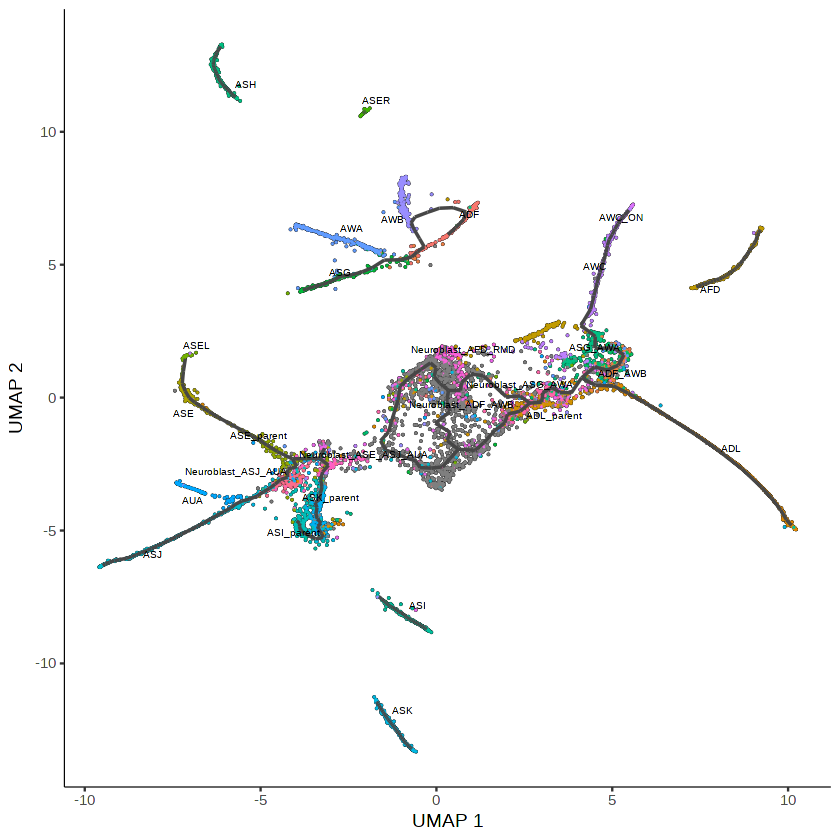

In [ ]:
cds <- learn_graph(cds)
plot_cells(cds,
           color_cells_by = "cell.type",
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE)

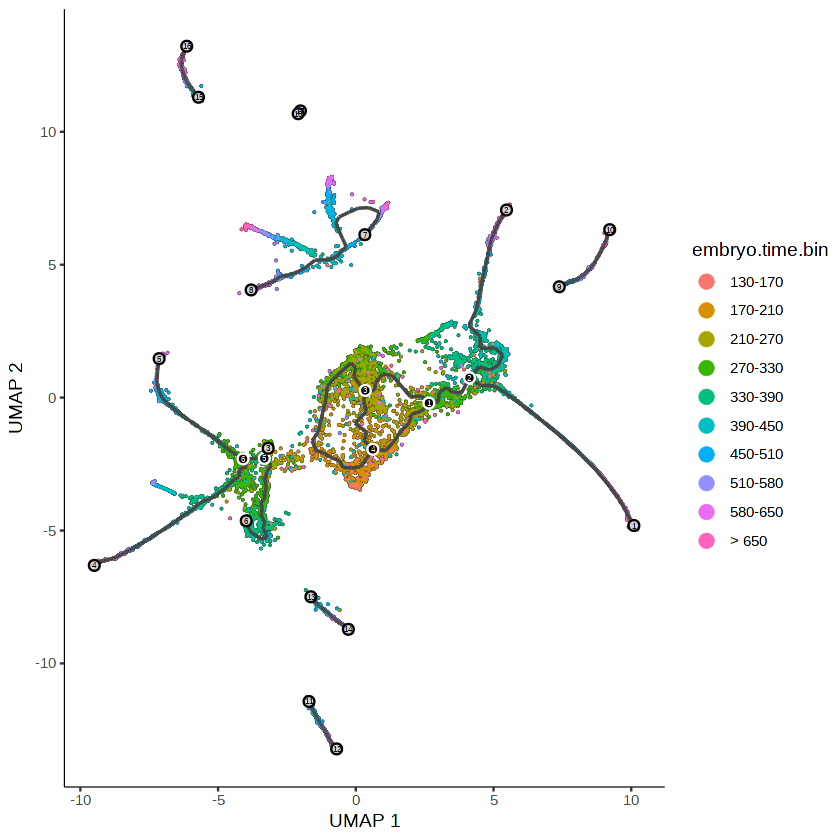

In [ ]:
plot_cells(cds,
           color_cells_by = "embryo.time.bin",
           label_cell_groups=FALSE,
           label_leaves=TRUE,
           label_branch_points=TRUE,
           graph_label_size=1.5)

In [ ]:
principal_graph(cds)

List of length 1
names(1): UMAP

In [ ]:
p_graph <- principal_graph(cds)[["UMAP"]]
igraph::V(p_graph) # V(): graph -> vertices

+ 343/343 vertices, named, from 7b7e590:
  [1] Y_1   Y_2   Y_3   Y_4   Y_5   Y_6   Y_7   Y_8   Y_9   Y_10  Y_11  Y_12 
 [13] Y_13  Y_14  Y_15  Y_16  Y_17  Y_18  Y_19  Y_20  Y_21  Y_22  Y_23  Y_24 
 [25] Y_25  Y_26  Y_27  Y_28  Y_29  Y_30  Y_31  Y_32  Y_33  Y_34  Y_35  Y_36 
 [37] Y_37  Y_38  Y_39  Y_40  Y_41  Y_42  Y_43  Y_44  Y_45  Y_46  Y_47  Y_48 
 [49] Y_49  Y_50  Y_51  Y_52  Y_53  Y_54  Y_55  Y_56  Y_57  Y_58  Y_59  Y_60 
 [61] Y_61  Y_62  Y_63  Y_64  Y_65  Y_66  Y_67  Y_68  Y_69  Y_70  Y_71  Y_72 
 [73] Y_73  Y_74  Y_75  Y_76  Y_77  Y_78  Y_79  Y_80  Y_81  Y_82  Y_83  Y_84 
 [85] Y_85  Y_86  Y_87  Y_88  Y_89  Y_90  Y_91  Y_92  Y_93  Y_94  Y_95  Y_96 
 [97] Y_97  Y_98  Y_99  Y_100 Y_101 Y_102 Y_103 Y_104 Y_105 Y_106 Y_107 Y_108
[109] Y_109 Y_110 Y_111 Y_112 Y_113 Y_114 Y_115 Y_116 Y_117 Y_118 Y_119 Y_120
+ ... omitted several vertices

In [ ]:
plot_cells(cds,
           color_cells_by = "embryo.time.bin",
           label_cell_groups=FALSE,
           label_leaves=TRUE,
           label_branch_points=TRUE,
           graph_label_size=1.5)

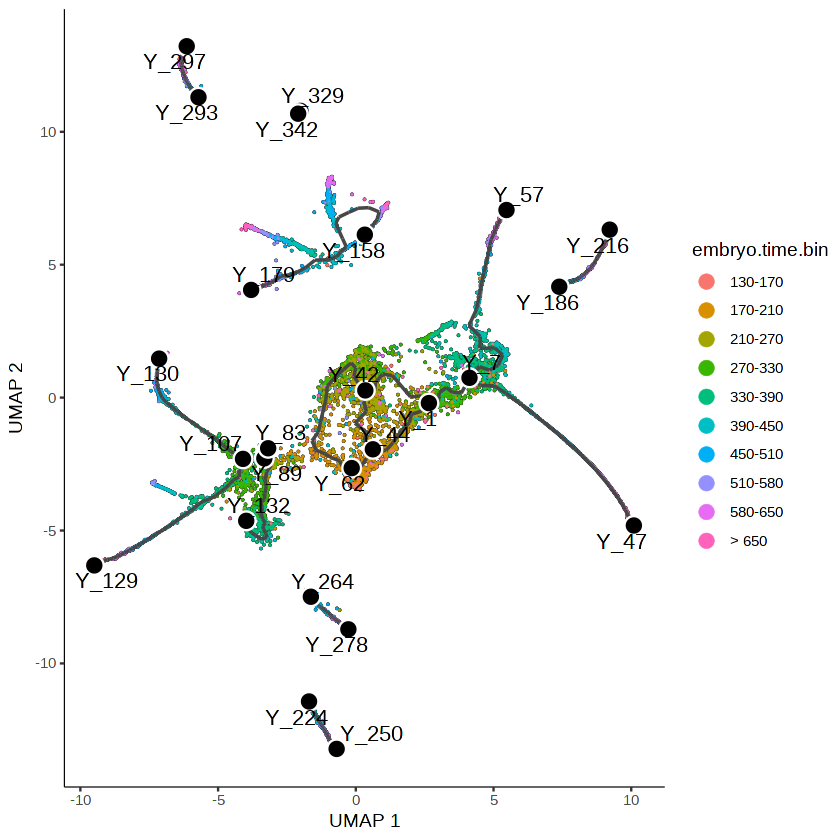

In [ ]:
plot_cells(cds,
          color_cells_by = "embryo.time.bin",
          label_cell_groups=FALSE,
          label_groups_by_cluster=FALSE,
          label_leaves=FALSE,
          label_branch_points=FALSE,
          label_principal_points = TRUE,       # set this to TRUE
          graph_label_size=3)

## Order cells

Assigns cells a pseudotime value based on their projection on the principal graph learned in the `learn_graph` function and the position of chosen root states.

This function takes as input a `cell_data_set` and returns it with pseudotime information stored internally. `order_cells()` optionally takes "root" state(s) in the form of cell or principal graph node IDs, which you can use to specify the start of the trajectory. If you don't provide a root state, an plot will be generated where you can choose the root state(s) interactively.

In [ ]:
# a helper function to identify the root principal points:
get_earliest_principal_node <- function(cds, time_bin="130-170"){
  cell_ids <- which(colData(cds)[, "embryo.time.bin"] == time_bin)
  # vertex is also called node in a graph
  closest_vertex <-
  cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])
  root_pr_nodes <-
  igraph::V(principal_graph(cds)[["UMAP"]])$name[as.numeric(names
  (which.max(table(closest_vertex[cell_ids,]))))]

  root_pr_nodes
}

The function above, `get_earliest_principal_node`, helps find the "starting point" in a path that cells follow as they change or develop, based on some time-related information.


In [ ]:
get_earliest_principal_node(cds)

[1] "Y_62"

In [ ]:
cds <- order_cells(cds, root_pr_nodes = "Y_44")


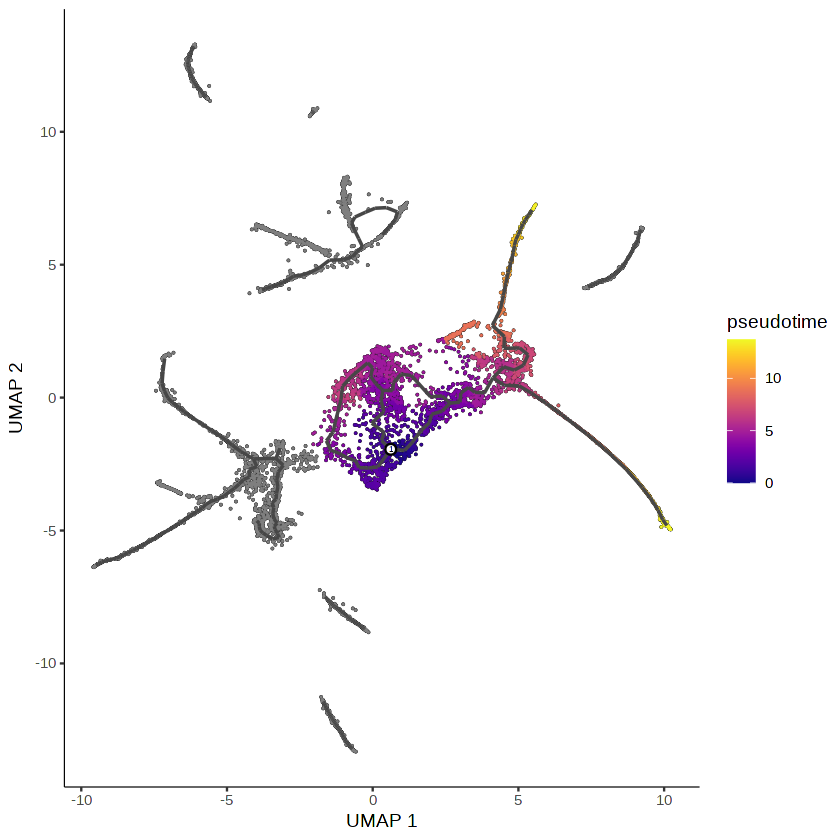

In [ ]:
plot_cells(cds,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)

Finding genes that change as a function of pseudotime
Identifying the genes that change as cells progress along a trajectory is a core objective of this type of analysis. Knowing the order in which genes go on and off can inform new models of development.

Let's return to the embryo data, which we processed using the commands

You can use `graph_test()` to find genes that are differentially expressed on the different path through the trajectory. The parameter, neighbor_graph="principal_graph", tells `graph_test()` to test whether cells at similar positions on the trajectory have correlated expression:

In [ ]:
ciliated_cds_pr_test_res <- graph_test(cds, neighbor_graph="principal_graph", cores=4)
pr_deg_ids <- row.names(subset(ciliated_cds_pr_test_res, q_value < 0.05))

  |===========================================================================| 100%, Elapsed 11:06


In [ ]:
pr_deg_ids[1:10]

[1] "WBGene00010957" "WBGene00010958" "WBGene00010959" "WBGene00010960"
 [5] "WBGene00010961" "WBGene00000829" "WBGene00010962" "WBGene00010963"
 [9] "WBGene00010964" "WBGene00010965"

Here are a couple of interesting genes that score as highly significant according to `graph_test()`:

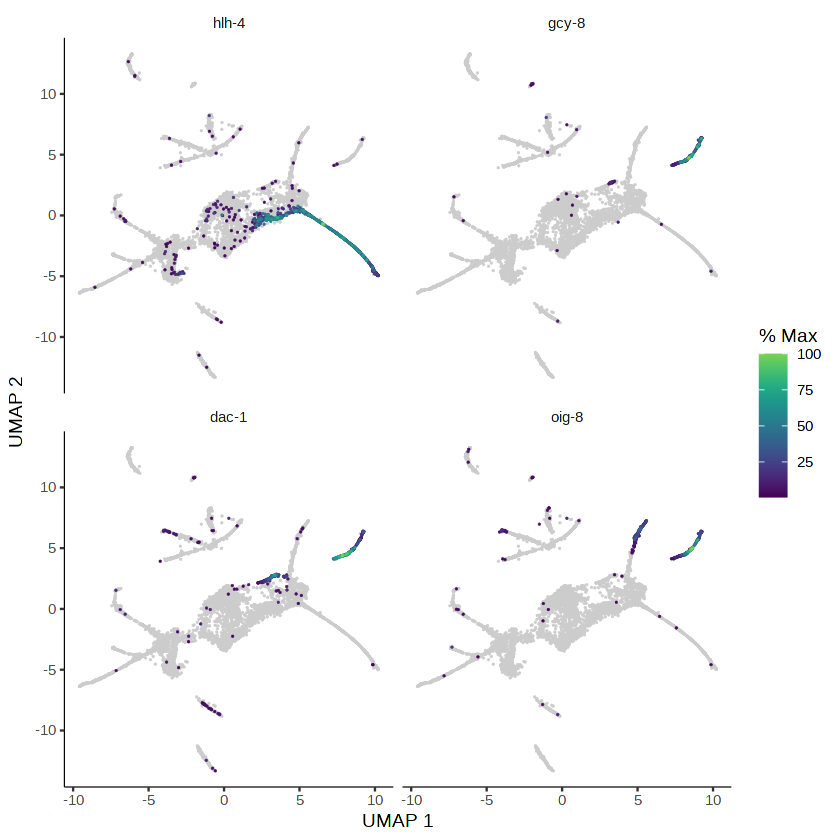

In [ ]:
plot_cells(cds, genes=c("hlh-4", "gcy-8", "dac-1", "oig-8"),
           show_trajectory_graph=FALSE,
           label_cell_groups=FALSE,
           label_leaves=FALSE)

We can then collect the trajectory-variable genes into modules:

In [ ]:
gene_module_df <- find_gene_modules(cds[pr_deg_ids,], resolution=c(10^seq(-6,-1)))


In [ ]:
dim(gene_module_df)
head(gene_module_df)

[1] 8065    5

id,module,supermodule,dim_1,dim_2
<chr>,<fct>,<fct>,<dbl>,<dbl>
WBGene00010957,1,1,4.403660,1.728205
WBGene00010958,1,1,4.681820,1.936727
WBGene00010959,1,1,4.360617,1.703318
WBGene00010960,1,1,4.390519,1.751321
WBGene00010961,1,1,4.423782,1.733623
WBGene00000829,1,1,4.378371,1.744795


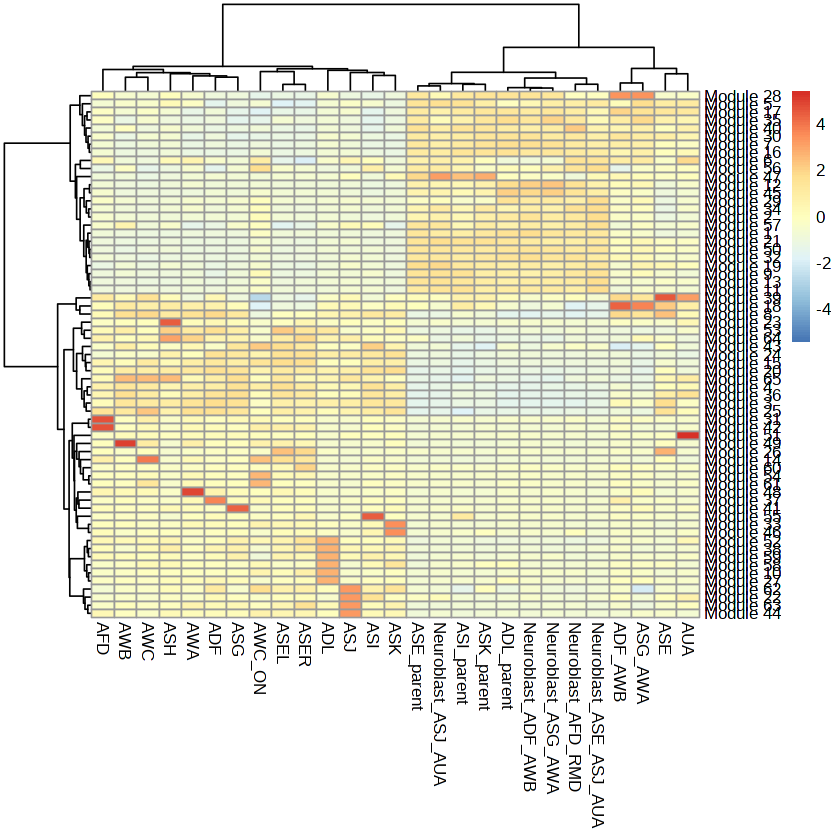

In [ ]:
cell_group_df <- tibble::tibble(cell=row.names(colData(cds)),
                                cell_group=colData(cds)$cell.type)
agg_mat <- aggregate_gene_expression(cds, gene_module_df, cell_group_df)
row.names(agg_mat) <- stringr::str_c("Module ", row.names(agg_mat))
pheatmap::pheatmap(agg_mat,
                   scale="column", clustering_method="ward.D2")

In [ ]:
gene_module_df <- find_gene_modules(cds[pr_deg_ids,], resolution=c(10^seq(-6,-1)))


You can also use `plot_cells()` on `gene_module_df`:

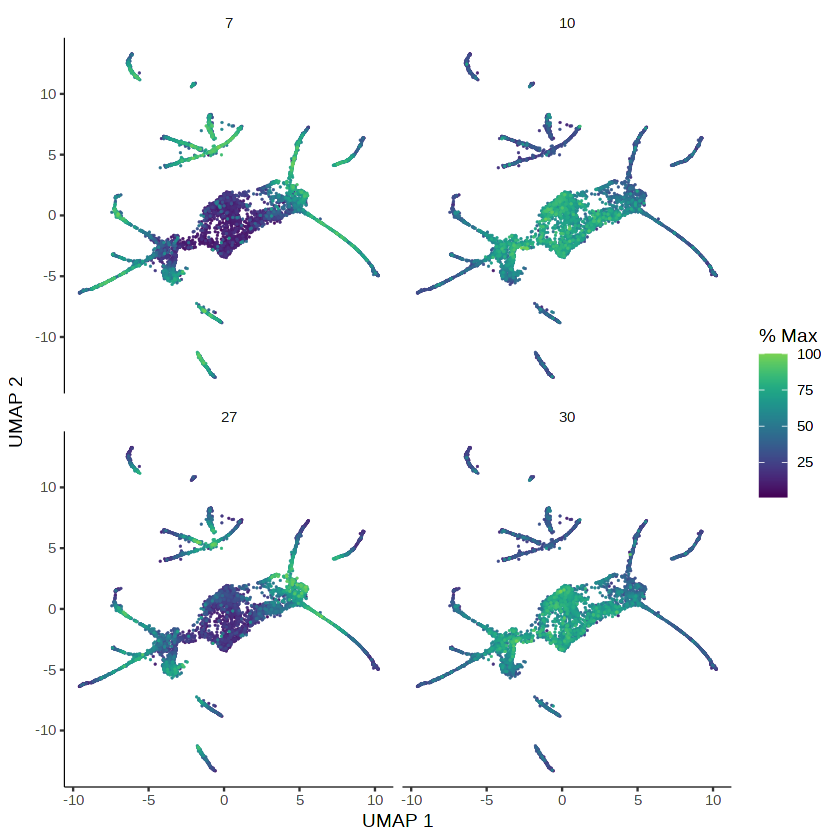

In [ ]:
plot_cells(cds,
           genes=gene_module_df %>% dplyr::filter(module %in% c(27, 10, 7, 30)),
           label_cell_groups=FALSE,
           show_trajectory_graph=FALSE)

Monocle offers another plotting function that can sometimes give a clearer view of a gene's dynamics along a single path. You can select a path with `choose_cells()` or by subsetting the cell data set by cluster, cell type, or other annotation that's restricted to the path. Let's pick one such path, the AFD cells:

In [ ]:
# Error: `choose_cells` only works in interactive mode.
# Not working in Jupyter notebook or colab
# May try this function in R studio or
# use new kernel `xeus-r`
# choose_cells(cds)

In [ ]:
AFD_genes <- c("gcy-8", "dac-1", "oig-8")
AFD_lineage_cds <- cds[rowData(cds)$gene_short_name %in% AFD_genes,
                       colData(cds)$cell.type %in% c("AFD")]

In [ ]:
AFD_lineage_cds

class: cell_data_set 
dim: 3 326 
metadata(2): cds_version citations
assays(1): counts
rownames(3): WBGene00001535 WBGene00000895 WBGene00020582
rowData names(3): id gene_short_name num_cells_expressed
colnames(326): AAACCTGCAAGACGTG-300.1.1 ACCAGTATCGTAGGTT-300.1.1 ...
  GCTGCGATCTTCTGGC-b02 GGGCACTAGCCTTGAT-b02
colData names(19): cell n.umi ... bg.b01.loading bg.b02.loading
reducedDimNames(3): PCA Aligned UMAP
mainExpName: NULL
altExpNames(0):

The function `plot_genes_in_pseudotime()` takes a small set of genes and shows you their dynamics as a function of pseudotime:

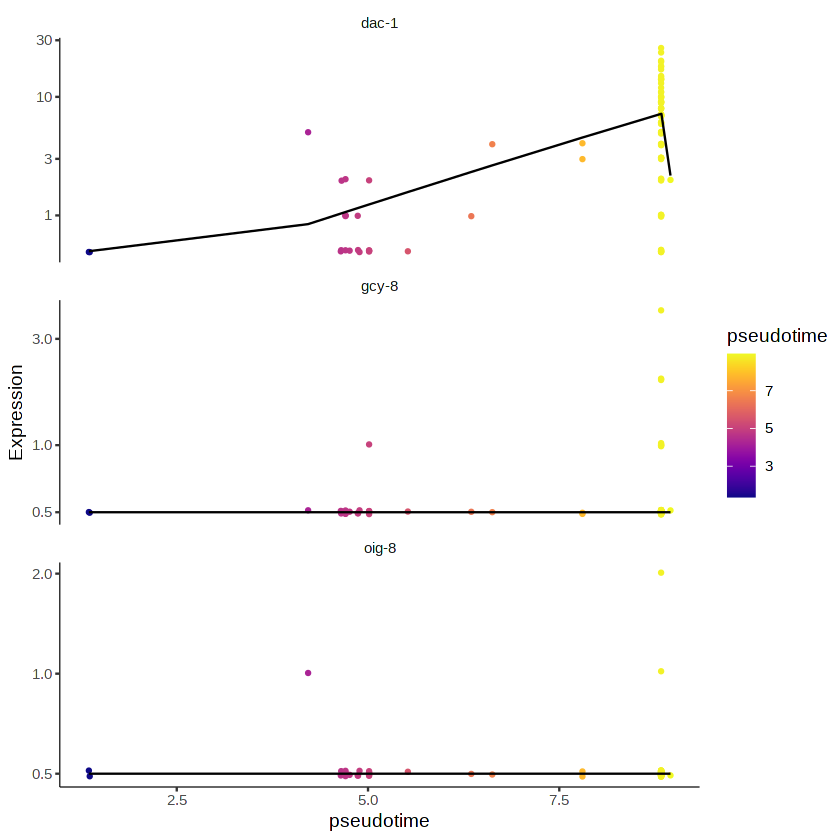

In [ ]:
plot_genes_in_pseudotime(AFD_lineage_cds,
                         min_expr=0.5)

As you can see, gene `dac-1` is activated before the other two genes.

## Reference

https://colab.research.google.com/drive/10fqFG9UVbazqeaZwbzpSAJ3I79tSoSYG#scrollTo=1onUusVNBvAr&line=1&uniqifier=1

https://cole-trapnell-lab.github.io/monocle3/docs/differential/#pseudo-dep

https://github.com/cole-trapnell-lab/monocle3/issues/179#issuecomment-2145687700
